# Sentiment Analysis of Video Game Reviews on Amazon

 - MSc in Data Science  	– Data Analytics and Algorithms Continuous    Assessment
 - Course Code         	- KCDAT_M_Y5 
 - Student             		-    Alan O' Reilly 
 - Student Number     	 - c00255172

## 1 Introduction

### 1.1 Objectives
The aim of this project, is to attempt to construct a framework, the goal of which, is to accurately predict user sentiment for video game purchases on amazon, based on the user reviews from the amazon user base. The project will incorporate NLP or _Natural language processing_ techniques to pre-process the user reviews, which will in turn allow that data to be used in a number of supervised machine learning algorithms (Thomas, 2019). 


### 1.2 Research Question

Can Sentiment Analysis be used to accurately predict the sentiment of user reviews on amazon?

Which machine learning algorithm offers the most accuracy in this prediction? 

### 1.3 Data Acquisition
The dataset selected for this project pertains to all the recorded user reviews under the "Video Games" section for Amazon.com during the year 2018. The data is stored as a JSON file, is 1.3 Gigs in size and contains a total 2,565,349 reviews. The parameters that make up the JSON file are as follows: 

-   reviewerID  - ID of the reviewer, e.g.  [A2SUAM1J3GNN3B](http://www.amazon.com/gp/cdp/member-reviews/A2SUAM1J3GNN3B)
-   asin  - ID of the product, e.g.  [0000013714](http://www.amazon.com/dp/0000013714)
-   reviewerName  - name of the reviewer
-   vote  - helpful votes of the review
-   style  - a disctionary of the product metadata, e.g., "Format" is "Hardcover" if it was for books
-   reviewText  - text of the review
-   overall  - rating of the product
-   summary  - summary of the review
-   unixReviewTime  - time of the review (unix time)
-   reviewTime  - time of the review (raw)
-   image  - images that users post after they have received the product

The structure of the JSON is as follows: 

    { "reviewerID": "A2SUAM1J3GNN3B", "asin": "0000013714", "reviewerName": "J. McDonald", "vote": 5, "style": { "Format:": "Hardcover" }, "reviewText": "I bought this for my husband who plays the piano. He is having a wonderful time playing these old hymns. The music is at times hard to read because we think the book was published for singing from more than playing from. Great purchase though!", "overall": 5.0, "summary": "Heavenly Highway Hymns", "unixReviewTime": 1252800000, "reviewTime": "09 13, 2009" }

This dataset, along with other similar datasets can be accessed at https://nijianmo.github.io/amazon/index.html.

### 1.4 Justification of Techniques
#### 1.4.1 Natural Language Processing 
To support the NLP aspect of this project, NLTK or the Natural Language Toolkit has been selected. NLTK is user friendly, is open source, offers vast and readable documentation and lots of out of the box code snippets. These attributes allow me to quickly prep-roccess the text that is needed in the construction of my machine learning models. 
#### 1.4.2 Machine Learning Techniques
When it comes to sentiment analysis, there are two established approaches, the machine learning approach and the lexicon based approach. This project will adopt the machine learning approach as outlined in the assignment brief. Within this machine learning approach there are two ways in which the machine can learn, unsupervised learning and supervised learning. In supervised learning the training dataset provided to the machine learning algorithm has already been fully labelled, or in other words each observation within the training dataset has been pre-tagged with the correct answer, which in turn we expect the machine learning prediction model to figure out on its own for each observation in the test dataset (Hartmann, Huppertz, Schamp and Heitmann, 2019). Conversely, unsupervised learning is where we entrust the machine learning process to figure out these patterns for us (Humphreys and Wang, 2017). The dataset used in the completion of this project is already labelled and thus supervised learning is the clear choice. The selected machine learning algorithms and their justifications are as follows:

Naive Bayes

 - Well cited in the literature as working well when used for text classification problems (Hadi, Al-Radaideh and Alhawari, 2018; Jiang, Li, Wang and Zhang, 2016; Kim, Kim, Kim and Lim, 2018). 
 
Support Vector Machine
 - Similar to Naive Bayes in that it is often cited as working well in problems of text classification (Cervantes, Garcia-Lamont, Rodríguez-Mazahua and Lopez, 2020; Luo, 2021; Purwandari, Sigalingging, Cenggoro and Pardamean, 2021; Yu et al., 2021)

Random Forest Classifier
 - Random Forest works differently to the two previous algorithms in that it implements a large number of decision tress that themselves work as de facto machine learning algorithms. The hope is that this, in theory, could provide more predictive performance than the single decision tree structure of Naive Bayes and Support Vector Machine (Luo, 2021).

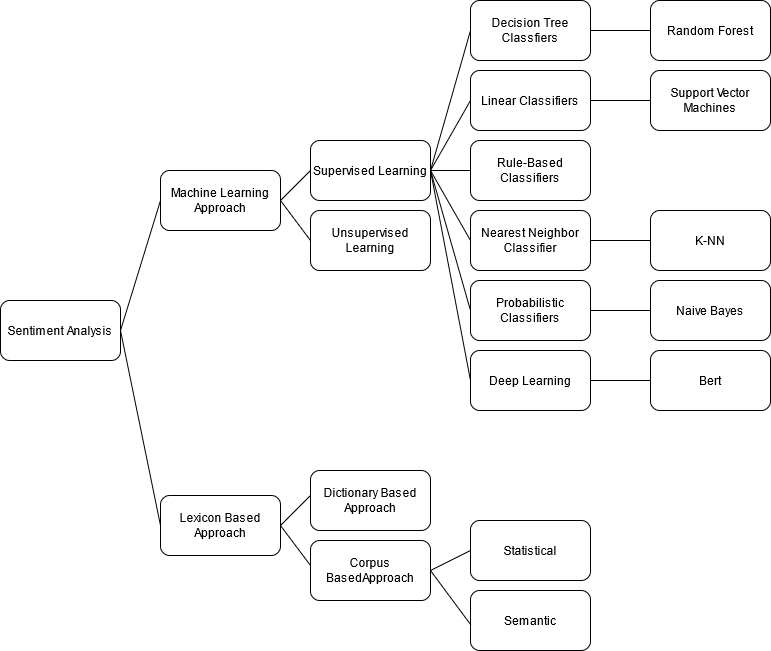

Importing the required Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import json
import numpy as np
import warnings
import re
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from math import sqrt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\licki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\licki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\licki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2 Data Ingestion

The json file within which the data is stored, is first brought into jupyter enviornment.

In [49]:
sourceFile = "data/Video_Games.json"
# sourceFile = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Video_Games.json.gz"

I wanted to get a look at how the json objects translated to dictionaries in python before storing them within a pandas dataframe

In [50]:
N = 3
with open(sourceFile, 'r') as f:
    for i in range(0, N):
        print(f.readline(), end = '')

{"overall": 1.0, "verified": true, "reviewTime": "06 9, 2014", "reviewerID": "A21ROB4YDOZA5P", "asin": "0439381673", "reviewerName": "Mary M. Clark", "reviewText": "I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.", "summary": "Did not like this", "unixReviewTime": 1402272000}
{"overall": 3.0, "verified": true, "reviewTime": "05 10, 2014", "reviewerID": "A3TNZ2Q5E7HTHD", "asin": "0439381673", "reviewerName": "Sarabatya", "reviewText": "The game itself worked great but the story line videos would never play, the sound was fine but the picture would freeze and go black every time.", "summary": "Almost Perfect", "unixReviewTime": 1399680000}
{"overall": 4.0, "vote": "15", "verified": true, "reviewTime": "02 7, 2014", "reviewerID": "A1OKRM3QFEATQO", "asin": "0439381673", "reviewerName": "Amazon Customer", "reviewText": "I had to learn the hard way after ordering this for my MacBook Pro that this does

I then store each json object within the json file as a list of dictionaries.

In [67]:
data=[]
with open(sourceFile, 'r') as file:
    for line in file.readlines():
        data.append(json.loads(line))
data[0]           

{'overall': 1.0,
 'verified': True,
 'reviewTime': '06 9, 2014',
 'reviewerID': 'A21ROB4YDOZA5P',
 'asin': '0439381673',
 'reviewerName': 'Mary M. Clark',
 'reviewText': 'I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.',
 'summary': 'Did not like this',
 'unixReviewTime': 1402272000}

I then confirm the size of the file matches the records within the json file.

In [52]:
len(data)

2565349

I then simply convert the list of dictionaries to pandas dataframe to take advantage of all that technologies functionality.

In [59]:
df=pd.DataFrame(data)
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


I save the dataframe to a csv file as a backup going forward

In [55]:
df.to_csv(r'data/reviews_dataframe.csv')

I extract the columns I deemed useful, mainly the ```reviewText``` column, which represents the review left by the user and ```overall``` which is the score out of 5 the user awarded the product. The ```overall``` rating will be used to try and predict the sentiment of the ```reviewText```.

In [56]:
df_reduced = df[['reviewerName','reviewText','overall']]

In [57]:
df_reduced.head(5)

,reviewerName,reviewText,overall
0,Mary M. Clark,I used to play this game years ago and loved i...,1.0
1,Sarabatya,The game itself worked great but the story lin...,3.0
2,Amazon Customer,I had to learn the hard way after ordering thi...,4.0
3,ColoradoPartyof5,The product description should state this clea...,1.0
4,Karen Robinson,I would recommend this learning game for anyon...,4.0


Based on the overall score I create a new column named ```sentiment``` that grades the users reviews more descriptively. 

In [58]:
df_reduced.loc[df_reduced['overall']==5.0, 'sentiment'] = 'Positive'
df_reduced.loc[df_reduced['overall']==4.0, 'sentiment'] = 'Somewhat Positive'
df_reduced.loc[df_reduced['overall']==3.0, 'sentiment'] = 'Neutral'
df_reduced.loc[df_reduced['overall']==2.0, 'sentiment'] = 'Somewhat Negative'
df_reduced.loc[df_reduced['overall']==1.0, 'sentiment'] = 'Negative'

I then again save this smaller dataframe as a ```csv```, as it will be used as the base going forward in the project. 

In [61]:
df_reduced.to_csv(r'data/reviews_dataframe_smaller.csv')

# 3 Data Preperation

I read back in the dataset as ```df``` so I can begin preparing it for analysis.

In [4]:
df= pd.read_csv("data/reviews_dataframe_smaller.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'reviewText', 'overall', 'sentiment'], dtype='object')

Here I just want to get an overview of breakdown of the reviews 

In [6]:
df['overall'].value_counts()

5.0    1487366
4.0     412413
1.0     311891
3.0     212346
2.0     141333
Name: overall, dtype: int64

I create a function that works to balance the dataset. It accepts a ```type``` which in this case the user score awarded, and a count. Count here refers to the amount of records to extract. 

In [7]:
def sample (type, count):
    return df[df['overall']==type].sample(n=count)

Below I created a new reduced dataframe, containing the sample dataset. The goal here is to balance the sample set so that it is evenly distributed across negative, positive and neutral user scores and in turn user reviews. So anything with a type 1 and 2 is negative, anything 3 is neutral and anything 4 or 5 is positive. That equals 60000 records for each category, for a total of 180000 records in the sample set.

In [8]:
df_reduced = pd.concat([sample(1,30000), sample(2,30000), sample(3,60000), sample(4,30000), sample(5,30000)])

In [9]:
len(df_reduced)

180000

A note on the above function and how I arrived at 180000 records total. This took a lot of trial and error in terms of the length of time the sample dataset took to train and test later on during the machine learning section. I originally wanted the largest possible sample set that was also evenly balanced, which was 637038 records. The training and testing on this sample sets sat at about 9 hours on my desktop before I cancelled it. Due to how resource heavy the training and testing was, it was not viable to leave the process unattended. I arrived at 180000 by staring small and working up, which was a nice sweet spot of total records in the sample set and processing resources needed.

Removing Duplicate Values and NA values

In [10]:
df_reduced=df_reduced.drop_duplicates()
df_reduced=df_reduced.reset_index(drop=True)
df_reduced = df_reduced.dropna(how='any',axis=0) 

In [11]:
df_reduced.reset_index(drop=True, inplace=True)
df_reduced.drop(df_reduced.columns[df_reduced.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_reduced

,reviewerName,reviewText,overall,sentiment
0,XxxGSxxX,"Bought the game for $60. Took it home, and co...",1.0,Negative
1,mimi,CAME IN BROKEN AND DIRTY. IT WAS SO EMBARASSI...,1.0,Negative
2,Mauricio Fonseca Gonzalez,no,1.0,Negative
3,R. Grawin,The sound quality on this thing is terrible; i...,1.0,Negative
4,Amazon Customer,the batteries I bought do not fit in the charg...,1.0,Negative
...,...,...,...,...
179896,John on the Internet,"First off let me just say, I was expecting it ...",5.0,Positive
179897,Marcree Perry,"This was a Christmas present for my daughter, ...",5.0,Positive
179898,Jason,Very fun game! lots of different stratigies an...,5.0,Positive
179899,M.Mandac,Great product for anyone learning to play Brid...,5.0,Positive


In [12]:
df_reduced.isnull().sum()

reviewerName    0
reviewText      0
overall         0
sentiment       0
dtype: int64

In [13]:
df_reduced.isna().sum()

reviewerName    0
reviewText      0
overall         0
sentiment       0
dtype: int64

I create a score variable that represents the users awarded score out of 5 but as an int.

In [14]:
df_reduced['score']=df_reduced['overall'].astype(int)

I then create two functions. ```to_sentiment``` to assign the users ```overall``` as either negative if 2 or under, as neutral if 3 and as positive if above 3. ```sentiment_to_rating``` then to assign those classifications as either a 0 1 or 2.

In [15]:
def to_sentiment(overall):
    overall=int(overall)
    if overall <=2:
        return 'Negative'
    elif overall ==3:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
def sentiment_to_rating(sentiment):
    if sentiment == 'Negative':
        return 0
    elif sentiment == 'Neutral':
        return 1
    else:
        return 2

I then apply the functions to their perspective columns, creating new columns in the process.

In [17]:
df_reduced["sentiment"]= df_reduced.overall.apply(to_sentiment)

In [18]:
df_reduced["ratings"]= df_reduced.sentiment.apply(sentiment_to_rating)

In [19]:
class_names = ['negative', 'neutral', 'positive']

A plot was then created to represent the class balance of the sample dataset taken.

Negative    59980
Neutral     59970
Positive    59951
dtype: int64


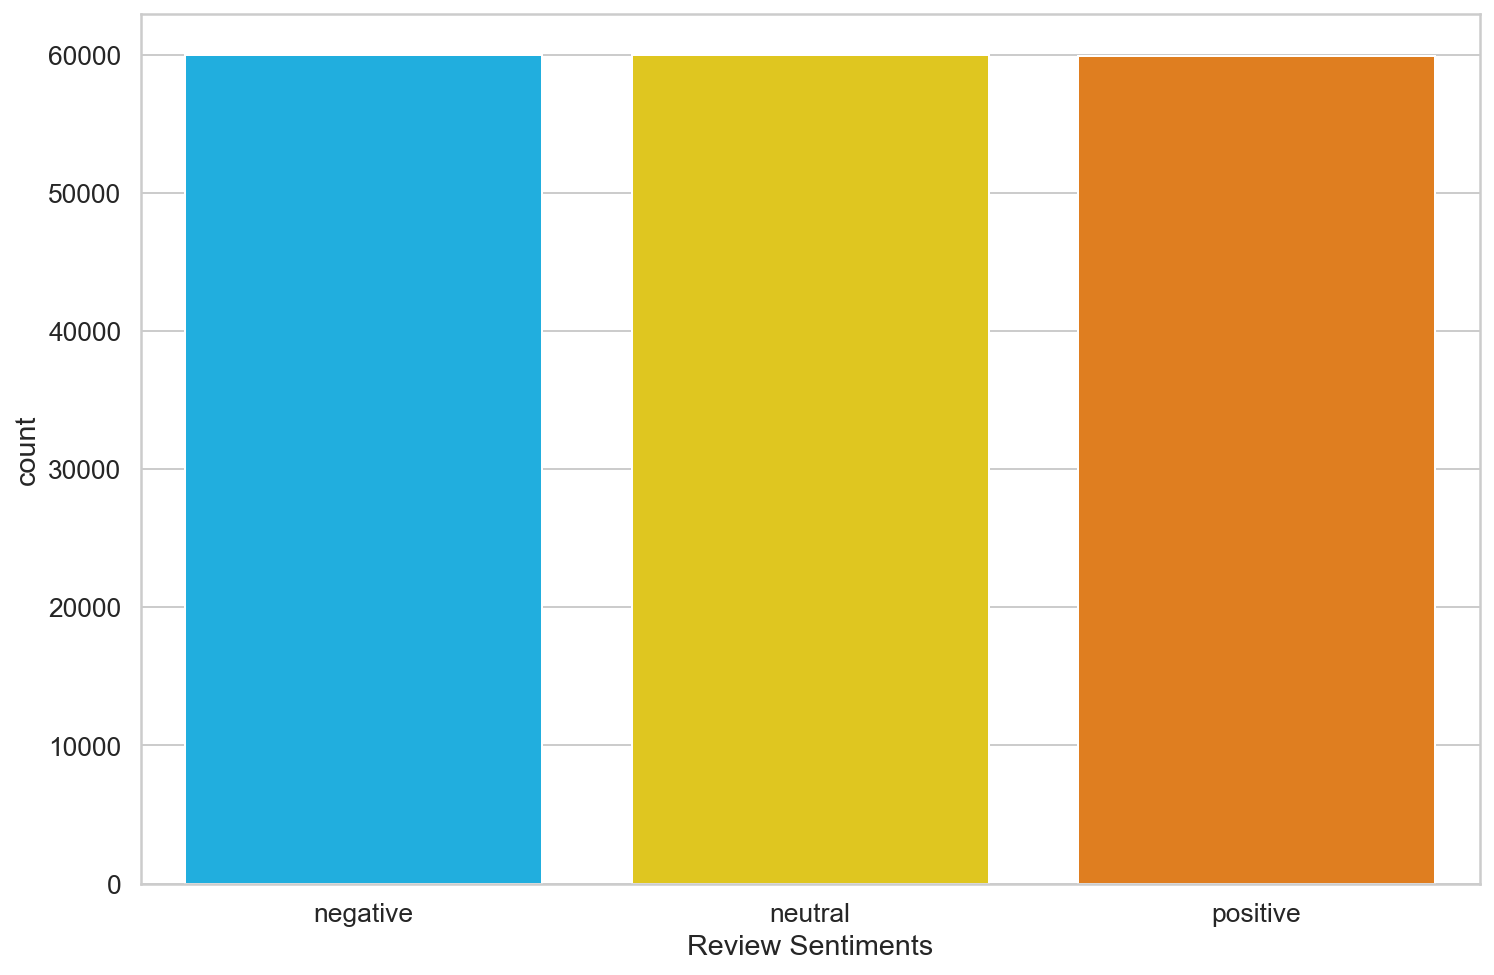

In [20]:
ax=sns.countplot(df_reduced['ratings'])
word_count=pd.value_counts(df_reduced['sentiment'].values, sort=True)
print(word_count)
plt.xlabel('Review Sentiments')
ax.set_xticklabels(class_names)
plt.savefig('class_balanced.png')

# 4 Data Pre-processing

The precision of any NLP method varies based on the different approaches available to use. For the purpose of this project I decided on the approach laid out by Kao (2010), in which the authors first advice that the any chunk of text should first be reduced to each of its sentences. Those sentences should then in turn be reduced to their individual words which the authors name as tokens. This processes is to be applied to each applicable record within the dataset. Once each target piece of text is reduced to tokens, the authors outline 7 steps each token should be subjected to, to make them fit for sentiment analysis. 

#### All tokens should be converted to lowercase

This ensures that the data set does not contain different versions of the same word. This is important as, for example, "Amazing", "amazing" and "AMAZING" are considered different words with NLTK's word embedding library.

#### Convert numeric values to there alphabetic representations

A user review may contain a sentence such as "I cleared this game 7 times since i bought it!", seven and 7 mean two different things to NLTK. So its is important to have a uniform representation, there for 7 becomes seven. 

#### Expanding Contractions
 
Contractions are words or combinations of words that are shortened such as **_do not_** to **_don’t_** and **_I would_** to **_I’d_**. These are very common within online reviews and social media. Converting each contraction into their original form helps with text standardisation when implementing NLP methods. 

#### Removing non-alphanumeric characters
 
Removing punctuation not only helps with text standardisation but also helps in lowering the training set by removing tokens.

#### Text Standardization
 
Reviews on e-commerce sites such as amazon are rarely in formal English. its not uncommon for reviewers to leave comments such as "Aweeeeeeesone!" as opposed to Awesome!. Regular expressions can be used to handle these use cases. This is also a vital step with regards to the next step, lemmatisation. Without text standardization, it can be impossible to find lemmas. 

#### Stemming and Lemmatisation

Manning, Raghavan and Schütze (2018)e xplain Stemming and Lemmatisation as follows
>The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
>
> However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

The fundamental distinction is that a lemma can be said to a component of some words inflective form where as a stem is not.  See the table below for examples of the differences. 


| From  | Suffic | Monographical Information | Stem | Lemma
|--|--|--|--|--|
| studies | "-es" | Third person, present tense of verb study | studi | study |
| study | "-ing" | Continous Tense of the verb study | study | study |
| cries| "-es" | Third person, singular simple present indictive form of cry| cri | cry|

#### The Removal of Stop Words
Typically words like "a", "of" or "for" offer no real insight into the sentiment of a user when they engage with some hypothetical social media post and are typically ignored or removed before applying machine learning 
methods. When dealing with reviews however some of these stopwords can be useful in inferring sentiment. For that reason words like "not", "never" and "because" will be kept and not removed. The process of removing stop words is handled using a predifined library within nltk. 

Below are the functions used to meet these 7 steps Kao, (2010) laid out. They are then brought together and called one by one with in the ```Preprocessing``` function.


In [3]:
# import the necessary libraries 
import nltk 
import string 
import re 

# import the inflect library 
import inflect 
p = inflect.engine() 

#Converting the sentence into lower case

def text_lowercase(text): 
	return text.lower()
  



# convert number into words 
def convert_number(text): 
	# split string into list of words 
	temp_str = text.split() 
	# initialise empty list 
	new_string = [] 

	for word in temp_str: 
		# if word is a digit, convert the digit 
		# to numbers and append into the new_string list 
		if word.isdigit(): 
			temp = p.number_to_words(word) 
			new_string.append(temp) 

		# append the word as it is 
		else: 
			new_string.append(word) 

	# join the words of new_string to form a string 
	temp_str = ' '.join(new_string) 
	return temp_str 

# Remove numbers 
def remove_numbers(text): 
	result = re.sub(r'\d+', '', text) 
	return result 


# Expand the contraction terms as outline @ https://www.sederet.com/tutorial/writing-tip-contraction-word-dalam-bahasa-inggris/
contractions_dict = {
        "ain't":"is not",
        "aint" : "is not",
        "amn't":"am not",
        "aren't":"are not",
        "arent":"are not,",
        "can't":"cannot",
        "cant":"cannot",
        "cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "didnt":"did not",
        "doesnt":"does not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "i'd":"i would",
        "I'll":"I will",
        "i'll":'i will',
        "I'm":"I am",
        "i'm":"i am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "isnt":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "itll":"it will",
        "it's":"it is",
        "i've":'i have',
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "lets":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "shant":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldnt":"should not",
        "shouldn't've":"should not have",
        "shouldntve":"should not have",
        "should've":"should have",
        "shouldve":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "wasnt":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wont":"will not",
        "wouldn't":"would not",
        "wouldnt":"would not",
        "would've":"would have",
        "wouldve":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "1st":"first",
        "2nd":"second",
        "cus":"because",
        "cuz":"because",
        "u":"you",
        "ff": "fast forward",
        "yrslf":"yourself",
        "hoped":"hope",
        "here's":"here is"
        }
def contraction_expand(text):
    text=text.split()
    for i in range(0, len(text)):
        
        if text[i] in contractions_dict:
            text[i] = contractions_dict[text[i]]
    mess = ' '.join(text)
    return(mess) 

# remove punctuation 
def remove_punctuation(text): 
	translator = str.maketrans('', '', string.punctuation) 
	return text.translate(translator) 

# Remove Special Characters
def remove_special_characters(text):
    replaced = re.sub("[^a-z ]+", '', text)
    return(replaced)

# remove escape characters
def remove_escape_characters(text):
    replaced = re.sub("[\\n\\t]+", '', text)
    return(replaced)

# remove whitespace from text 
def remove_whitespace(text): 
	return " ".join(text.split()) 


from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# remove stopwords function 
def remove_stopwords(text):
    operators = set(('not','never', 'no','because','off','until','very'))
    stop = set(stopwords.words('english'))-operators
    nostopwords = [word for word in text.split() if word.lower() not in stop]
    nostopwords = ' '.join(nostopwords)
    return nostopwords


 
# Lemmatization
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text): 
	word_tokens = word_tokenize(text) 
	# provide context i.e. part-of-speech 
	lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
	return lemmas 


def Preprocessing(input_str):
    input_str = text_lowercase(input_str)
    input_str = contraction_expand(input_str)
    input_str = convert_number(input_str)
    input_str = remove_numbers(input_str)
    input_str = remove_punctuation(input_str)
    input_str = remove_whitespace(input_str) 
    input_str = remove_escape_characters(input_str)
    input_str = remove_special_characters(input_str)
    input_str = remove_stopwords(input_str)
    input_str = lemmatize_word(input_str)
    return input_str
 

## The process above is laid out in greater detail @https://towardsdatascience.com/preprocessing-text-data-in-python-an-introduction-via-kaggle-7d28ad9c9eb

Here I just test the ```Preprocessing``` function to make sure it is working correctly before moving onto creating the models. 

In [22]:
print(df_reduced['reviewText'][11])

I very rarely write reviews, but I feel I must in this case. After waiting more than a year following the PS4's release to have an "official" remote, I pre-ordered this one when it was available for sale. Having owned several universal remotes in the past, I've always been able to customize them to function, well, universally.

Not the case with this one. As others mentioned, it does not allow volume punch through to an amp. This is fine if your setup is just a TV and PS4, but for those of us with amps, this is a deal breaker. How a remote can be billed as universal and not do something as basic as volume punch through (which every universal remote I've ever owned had been capable of) is dumbfounding. And it doesn't have any connectivity to which the firmware can be updated.

PDP dropped the ball for releasing an incomplete product (and not stating the limitations clearly online or in the manual), and Sony dropped the ball by continuing to put obstacles in the way of making the PS4 a t

In [23]:
print(Preprocessing(df_reduced['reviewText'][11]))

['very', 'rarely', 'write', 'review', 'feel', 'must', 'case', 'wait', 'year', 'follow', 'pss', 'release', 'official', 'remote', 'preordered', 'one', 'available', 'sale', 'own', 'several', 'universal', 'remotes', 'past', 'always', 'able', 'customize', 'function', 'well', 'universally', 'not', 'case', 'one', 'others', 'mention', 'not', 'allow', 'volume', 'punch', 'amp', 'fine', 'setup', 'tv', 'ps', 'us', 'amps', 'deal', 'breaker', 'remote', 'bill', 'universal', 'not', 'something', 'basic', 'volume', 'punch', 'every', 'universal', 'remote', 'ever', 'own', 'capable', 'dumbfound', 'not', 'connectivity', 'firmware', 'update', 'pdp', 'drop', 'ball', 'release', 'incomplete', 'product', 'not', 'state', 'limitations', 'clearly', 'online', 'manual', 'sony', 'drop', 'ball', 'continue', 'put', 'obstacles', 'way', 'make', 'ps', 'true', 'multimedia', 'device']


In [24]:
df_reduced.columns

Index(['reviewerName', 'reviewText', 'overall', 'sentiment', 'score',
       'ratings'],
      dtype='object')

Here I split the sample dataset into  a training and test dataset using the tried and true 80/20 split.

In [25]:
from sklearn.model_selection import train_test_split
X = df_reduced['reviewText']
y = df_reduced['ratings']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


Before getting into the machine learning I wanted to take a look at the breakdown of the tokens and see if anything interesting could be gleaned from the list of words. I added a new column named ```text_prep``` containing the ```preprocessed``` results of the ```reviewText``` column for each observation. 

In [26]:
df_reduced['text_prep'] = df_reduced['reviewText'].apply(lambda x:Preprocessing(x))
df_reduced.head()

,reviewerName,reviewText,overall,sentiment,score,ratings,text_prep
0,XxxGSxxX,"Bought the game for $60. Took it home, and co...",1.0,Negative,1,0,"[buy, game, take, home, could, not, play, beca..."
1,mimi,CAME IN BROKEN AND DIRTY. IT WAS SO EMBARASSI...,1.0,Negative,1,0,"[come, break, dirty, embarassing, nephews, bir..."
2,Mauricio Fonseca Gonzalez,no,1.0,Negative,1,0,[no]
3,R. Grawin,The sound quality on this thing is terrible; i...,1.0,Negative,1,0,"[sound, quality, thing, terrible, frequently, ..."
4,Amazon Customer,the batteries I bought do not fit in the charg...,1.0,Negative,1,0,"[batteries, buy, not, fit, charger, one, batte..."


I then created a Word Cloud. A word cloud helps visualise the breakdown of text by displaying the most commonly occuring words. The more often a word appears within the ```text_prep``` column the larger and more bold it appears in the word cloud. 

In [27]:
words = list(map(' '.join, df_reduced['text_prep']))
words = str(words)
split_word = " ".join([word for word in words.split()])

In [28]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(split_word)

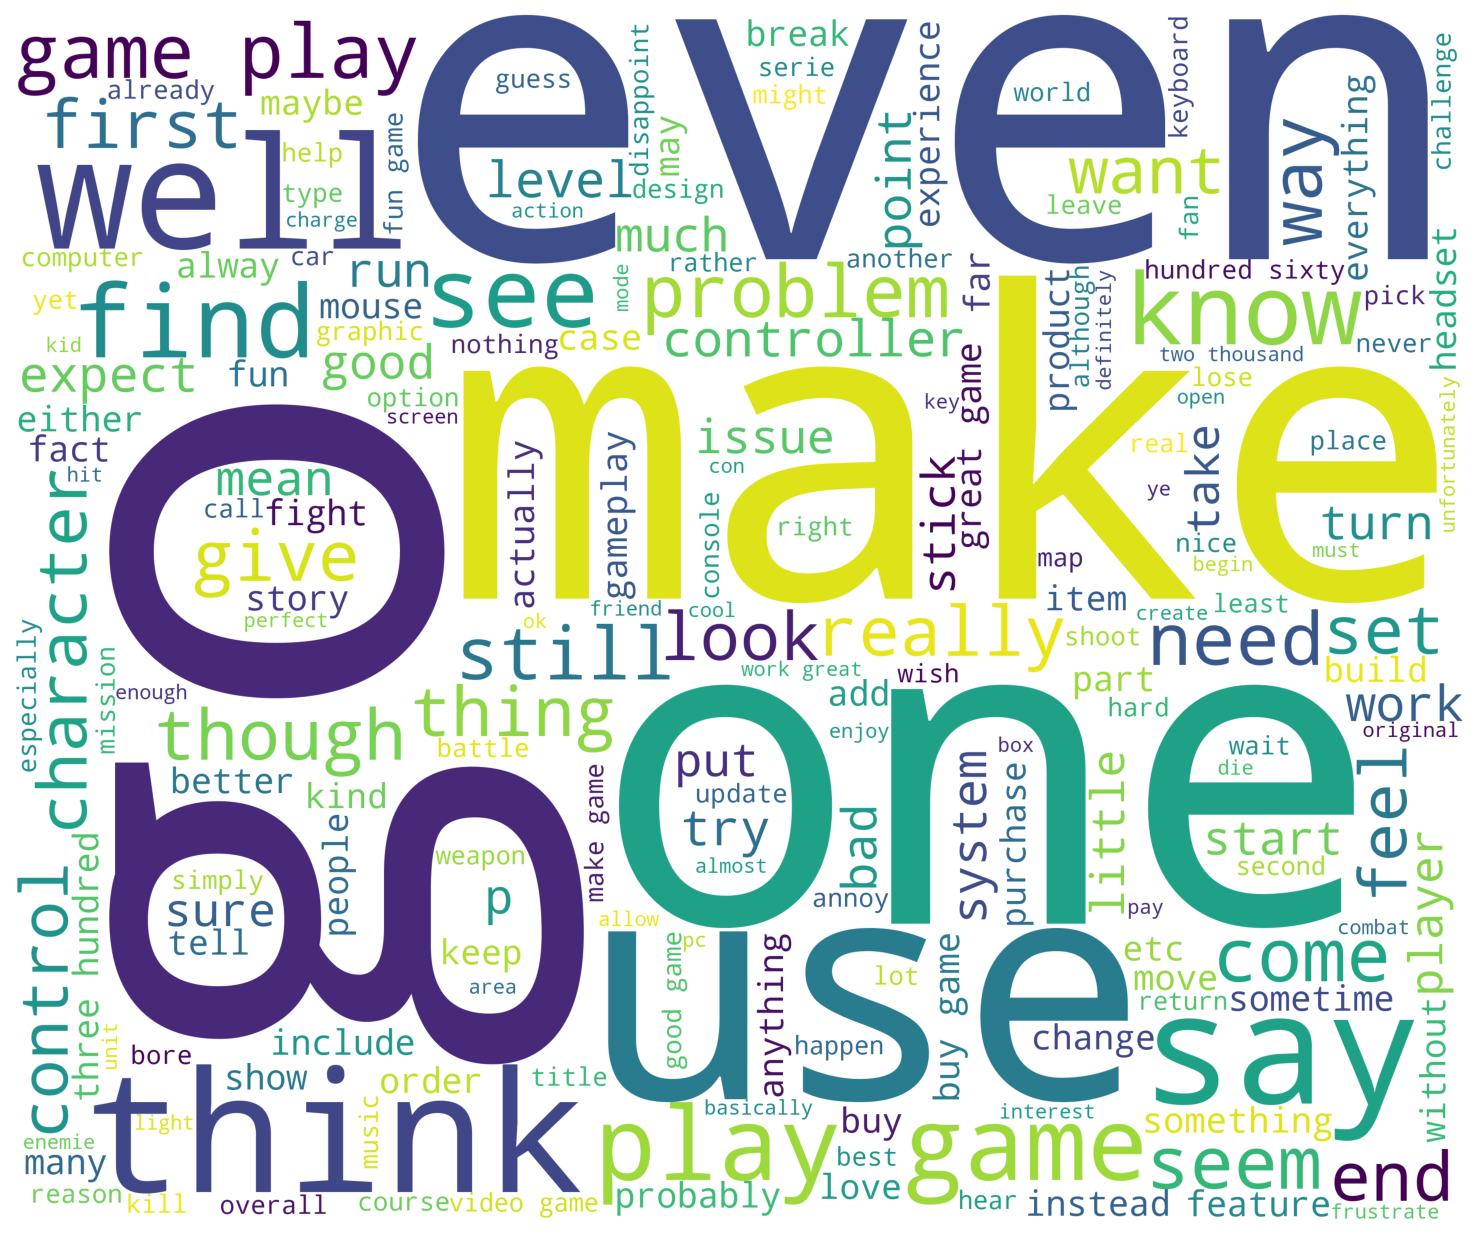

In [29]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud1.png')

From the word cloud we can see words a casual observer would associate with games, such as "use", "play" and "character". In terms of inferring sentiment, we can see words like "control", "feel" and "good". 

In [30]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179901 entries, 0 to 179900
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewerName  179901 non-null  object 
 1   reviewText    179901 non-null  object 
 2   overall       179901 non-null  float64
 3   sentiment     179901 non-null  object 
 4   score         179901 non-null  int32  
 5   ratings       179901 non-null  int64  
 6   text_prep     179901 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 8.9+ MB


# 5 Applying Machine Learning Algorithms

## 5.1 Implementation and Reporting

### 5.1.1 Constructing the Pipeline

The first step of applying the machine learning algorithms is automating some of the workflow involved. This is done by creating a pipeline to train the model. The steps involved in this pipeline will be ```Preprocessing``` -> ```Obtaining Bag of Word``` -> ```Applying TF-IDF Vectorisation``` -> ```Application of Model```. The code to complete the preprocessing step has already been completed and thus only needs to be applied. The bag-of-words here is built by taking the result of the ```Prepocessing``` function output, passing that result into  ```CountVectorizer``` which builds a feature dictionary, then converts documents to feature vectors. The problem with the ```CountVectorizer``` is it is biased towards the frequency in which words appear, which leads to the overlooking of rare words, which may offer insight into the sentiments, and allow us to process the data more efficiently. To overcome this problem the ```TfidfTransformer``` function is used. ```tfidf``` ranks words by contrasting how often a word appears into some document with how many times the same word appears in other documents. Finally the ```classifier``` is simply the machine learning classification model chosen for the specific pipeline.



### 5.1.2 Classifcation Report

The classification report for each model displays the resulting metrics of the model for which it was called on. Those metrics visualised are as follows:

#### Recall

Of all the reviews that actually belong some sentiment class, how many have been correctly identified as belonging to that class.

#### Precision

The measure of reviews correctly identified as belonging to some sentiment class, so if the result is x%, the model is correct at predicting a reviews sentiment x% of the time.

#### Accuracy

Accuracy as it relates to the classification report simply refers to the ratio of the correct predictions vs the total number of predictions.

#### F1-Score 

The F1-Score takes the Recall value and Precision value and aims to convey the balance between precision and recall by calculating a harmonic mean.

#### Support
 
Refers to the number of occurrence of the given class within the dataset.




### 5.1.3 Confusion Matrix

The confusion matrix offers another visualisation of the performance of the classification models.  It displays the following information:

1. True Positive: reviews that were accurately predicted as being the correct class.
2. True Negative: reviews that were accurately predicted as not being the correct class.
3. False Positive: reviews that were incorrectly predicted as being the correct class.
4. False Negative: reviews that were incorrectly predicted as not being the correct class.

## 5.2 Naive Bayes Algorithm 

Of all the probabilistic classifier models, the Naive Bayes Algorithm is considered one of the simplest (Yang, 1999). It works by taking the training documents and estimating a class-conditional document distribution, denoted as ```P(d| c)```, onto which it applies the Bayes rule. The goal is to estimate ```P(c| d)``` for the test documents. Regarding sentiment analysis, NB typically preforms well when the words within the dataset contain strong signal words (Domingos, 2012). Its also preforms best when a straight forward connection between the text being analyzed and the classifications e.g. the word Hate -> Negative (Yang, Nie, Xu, & Guo, 2006).

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [7]:
pipeNB = Pipeline([
    ('bow',CountVectorizer(analyzer=Preprocessing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# a deeper look at developing a pipeline with pyton can be viewerd @ https://www.omecha.info/blog/beyond-the-sklearn-tutorial.html

In [33]:
pipeNB.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function Preprocessing at 0x000001FE82E9E9D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [34]:
pred = pipeNB.predict(x_test)

Classification Report of Naive Bayes Algorithm

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     11884
           1       0.48      0.59      0.53     11963
           2       0.75      0.55      0.63     12134

    accuracy                           0.60     35981
   macro avg       0.62      0.60      0.60     35981
weighted avg       0.62      0.60      0.60     35981



Confusion Matrix of Naive Bayes Algorithm

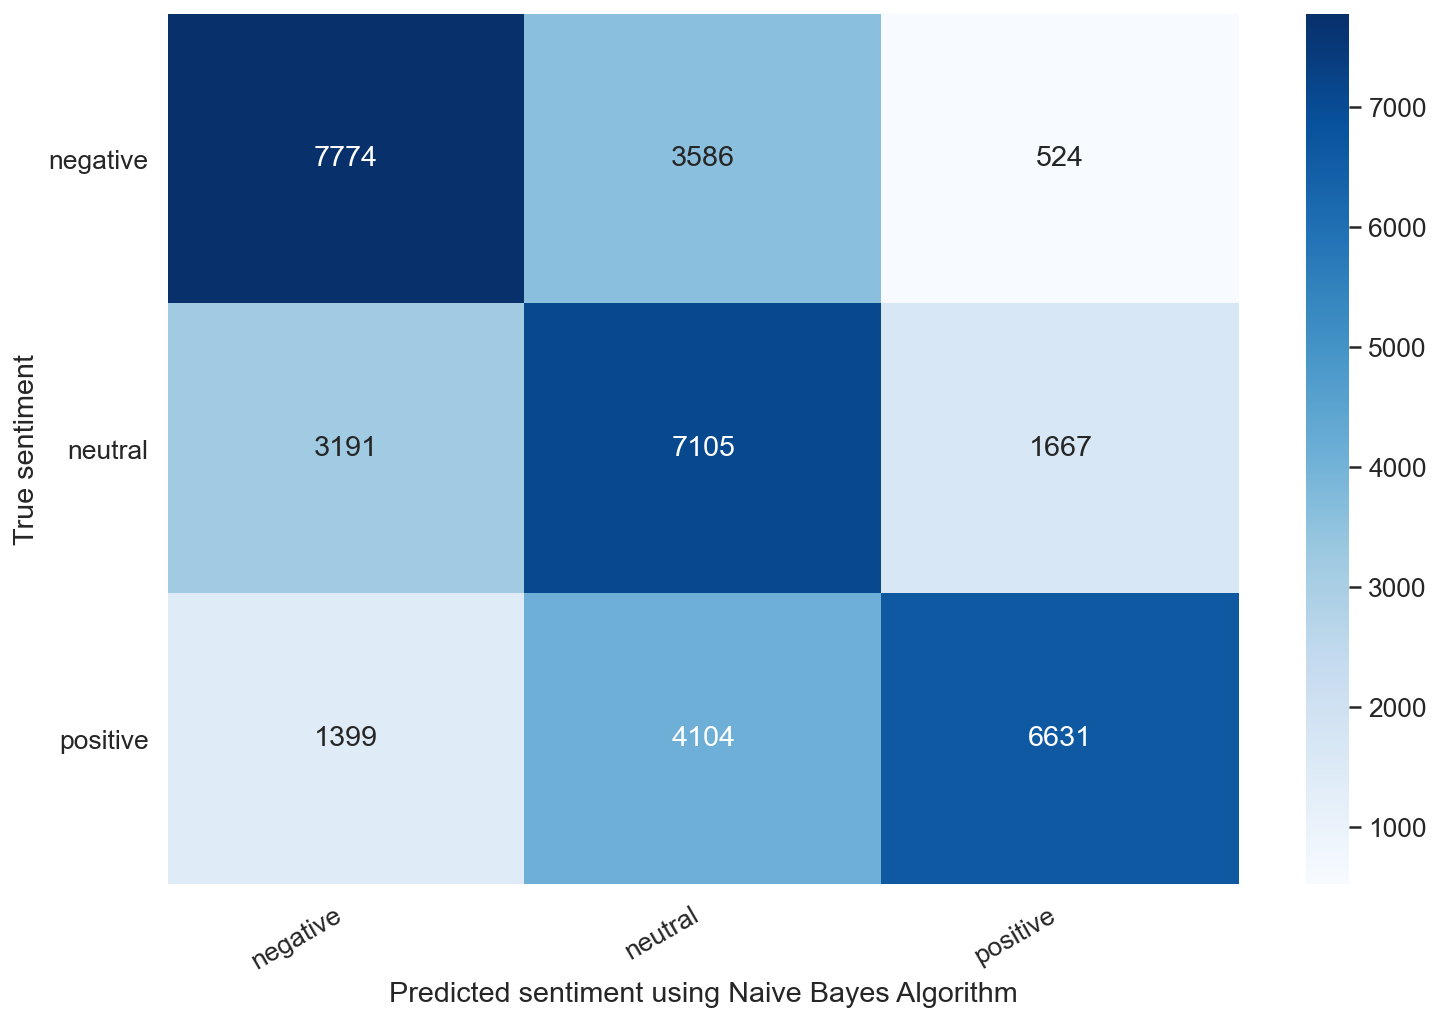

In [36]:
def nb_show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Actual Sentiment')
  plt.xlabel('Naive Bayes Algorithm Predicted Sentiment');
cm = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
nb_show_confusion_matrix(df_cm)

## 5.3 Random Forest Algorithm


Random Forest, in this context, is a machine learning method the generates a large array of random uncorrelated decision trees (Breiman, 2001). Each one of these trees then casts a vote for the classification of the text data. The class that receives the most votes is what determines the final prediction of this classifier(Breiman, 1996). 

In [37]:
from sklearn.ensemble import RandomForestClassifier
pipeRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=Preprocessing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [38]:
pipeRFC.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function Preprocessing at 0x000001FE82E9E9D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [39]:
pred = pipeRFC.predict(x_test)


Classification Report of Naive Bayes Algorithm

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68     11884
           1       0.52      0.52      0.52     11963
           2       0.74      0.63      0.68     12134

    accuracy                           0.63     35981
   macro avg       0.63      0.63      0.63     35981
weighted avg       0.63      0.63      0.63     35981



Confusion Matrix of Random Forest

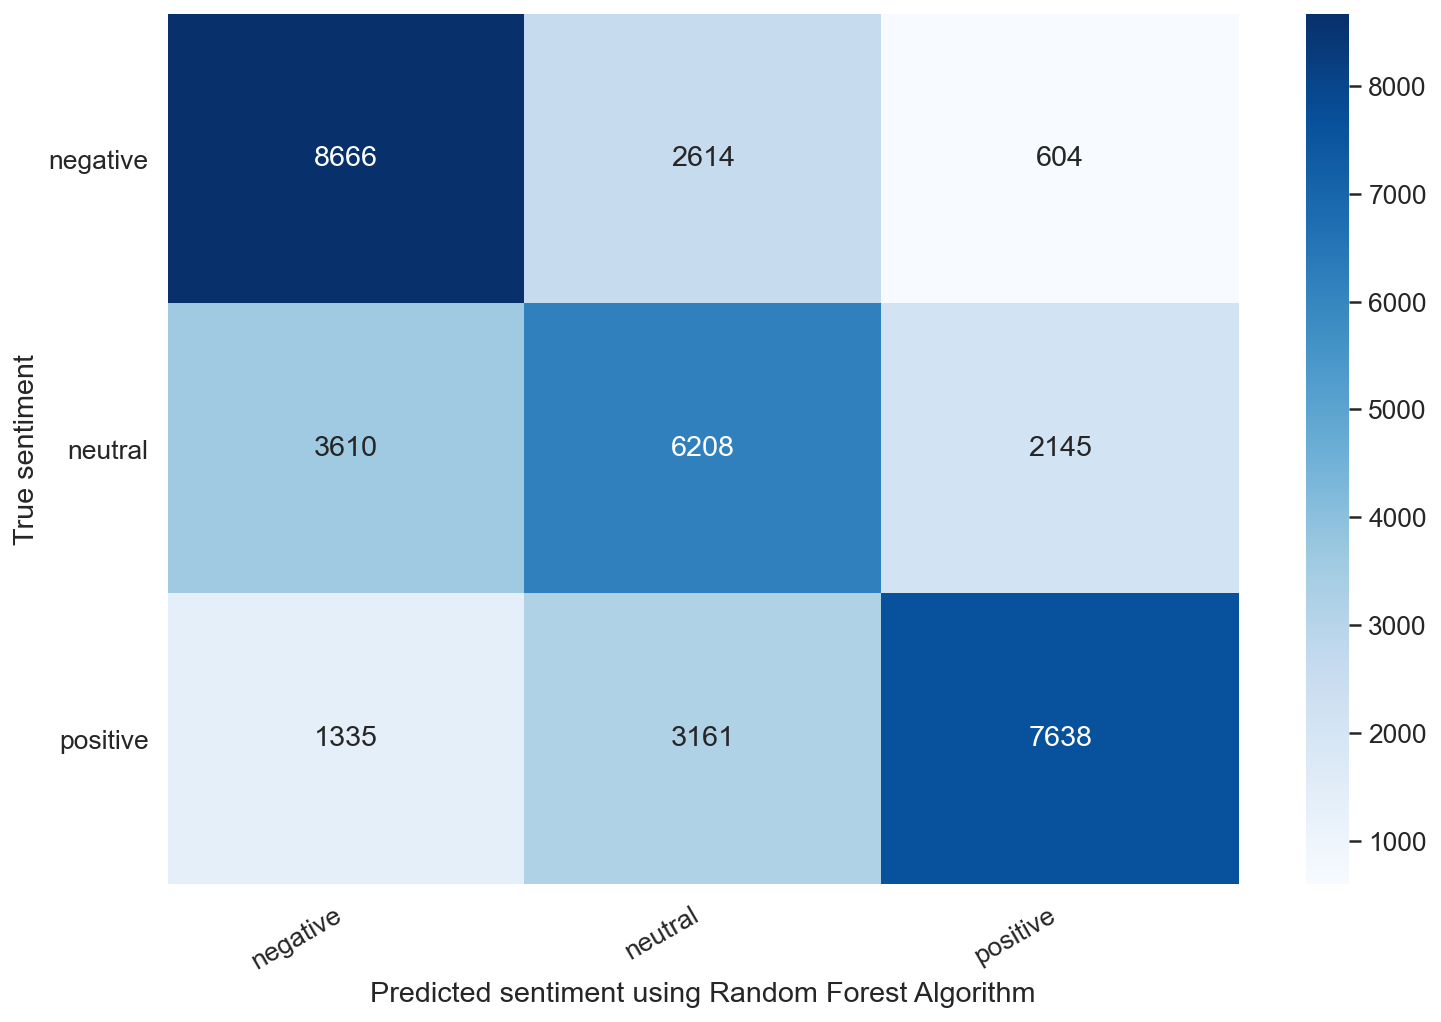

In [41]:
def RF_show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Actual Sentiment')
  plt.xlabel('Random Forest Algorithm Predicted Sentiment');
cm = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
RF_show_confusion_matrix(df_cm)

## 5.4 Support Vector Machine

Support Vector Machines or SVM's are based around the idea of attempting to find a hyperplane that best divides some dataset into two distinct classes (Cortes & Vapnik, 1995). The support vectors themselves then refer to the data points that are the nearest to that generated hyperplane (Bennett & Campbell, 2000).

In [42]:
from sklearn.svm import SVC
pipeSVM = Pipeline([
    ('bow',CountVectorizer(analyzer=Preprocessing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC(kernel='linear'))
])


In [43]:
pipeSVM.fit(x_train,y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function Preprocessing at 0x000001FE82E9E9D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SVC(kernel='linear'))])

In [44]:
pred = pipeSVM.predict(x_test)


Classification Report

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70     11884
           1       0.54      0.52      0.53     11963
           2       0.73      0.72      0.73     12134

    accuracy                           0.65     35981
   macro avg       0.65      0.65      0.65     35981
weighted avg       0.65      0.65      0.65     35981



Confusion Matrix of Support Vector Machine Algorithm

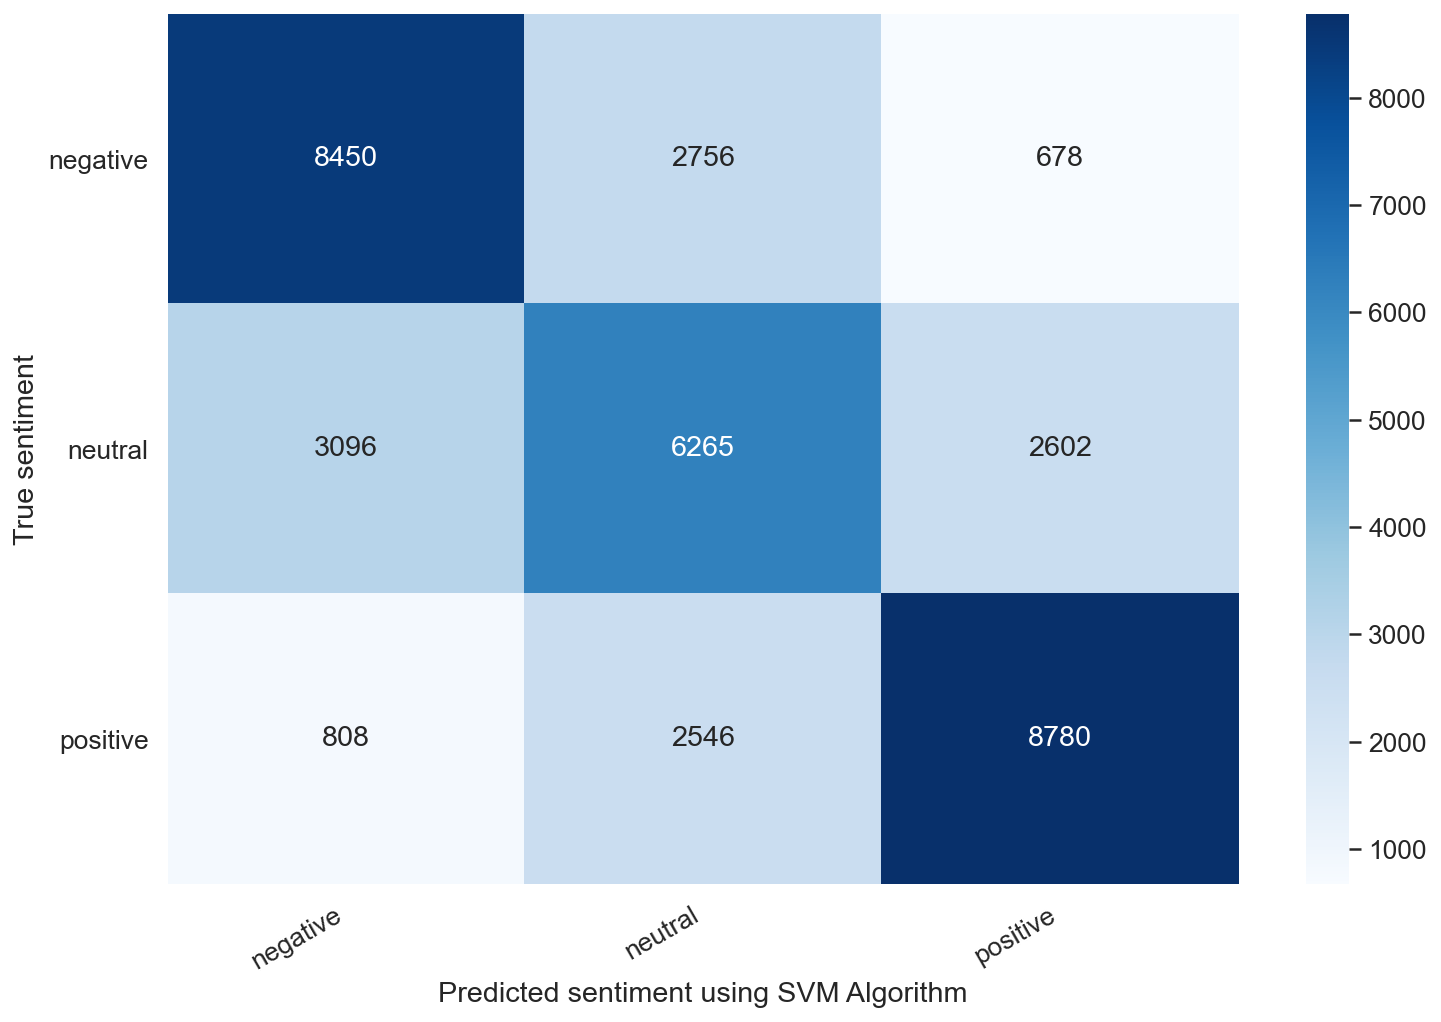

In [46]:
def SVM_show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Actual sentiment')
  plt.xlabel('SVM Algorithm Predicted Sentiment');
cm = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
SVM_show_confusion_matrix(df_cm)

## 5.5  KNN Classifier


I included the KNN classifier at the last moment. I originally planned on leaving it out as the literature suggest that KNN is best served when used on text sources that are much smaller than the one used here, but I included it as a contrast to the 3 other methods. KNN works off of the assumption that things of the same type tend to congregate together. For the purpose of this example k will be set to a value of 3 as outlined by Yang & Liu (1999).

Classification Report of KNN Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier
pipeKNN = Pipeline([
    ('bow',CountVectorizer(analyzer=Preprocessing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=3))
])
pipeKNN.fit(x_train,y_train)
pred = pipeKNN.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.19      0.28     11884
           1       0.47      0.07      0.12     11963
           2       0.37      0.91      0.52     12134

    accuracy                           0.39     35981
   macro avg       0.46      0.39      0.31     35981
weighted avg       0.46      0.39      0.31     35981



Confusion Matrix of KNN Algorithm

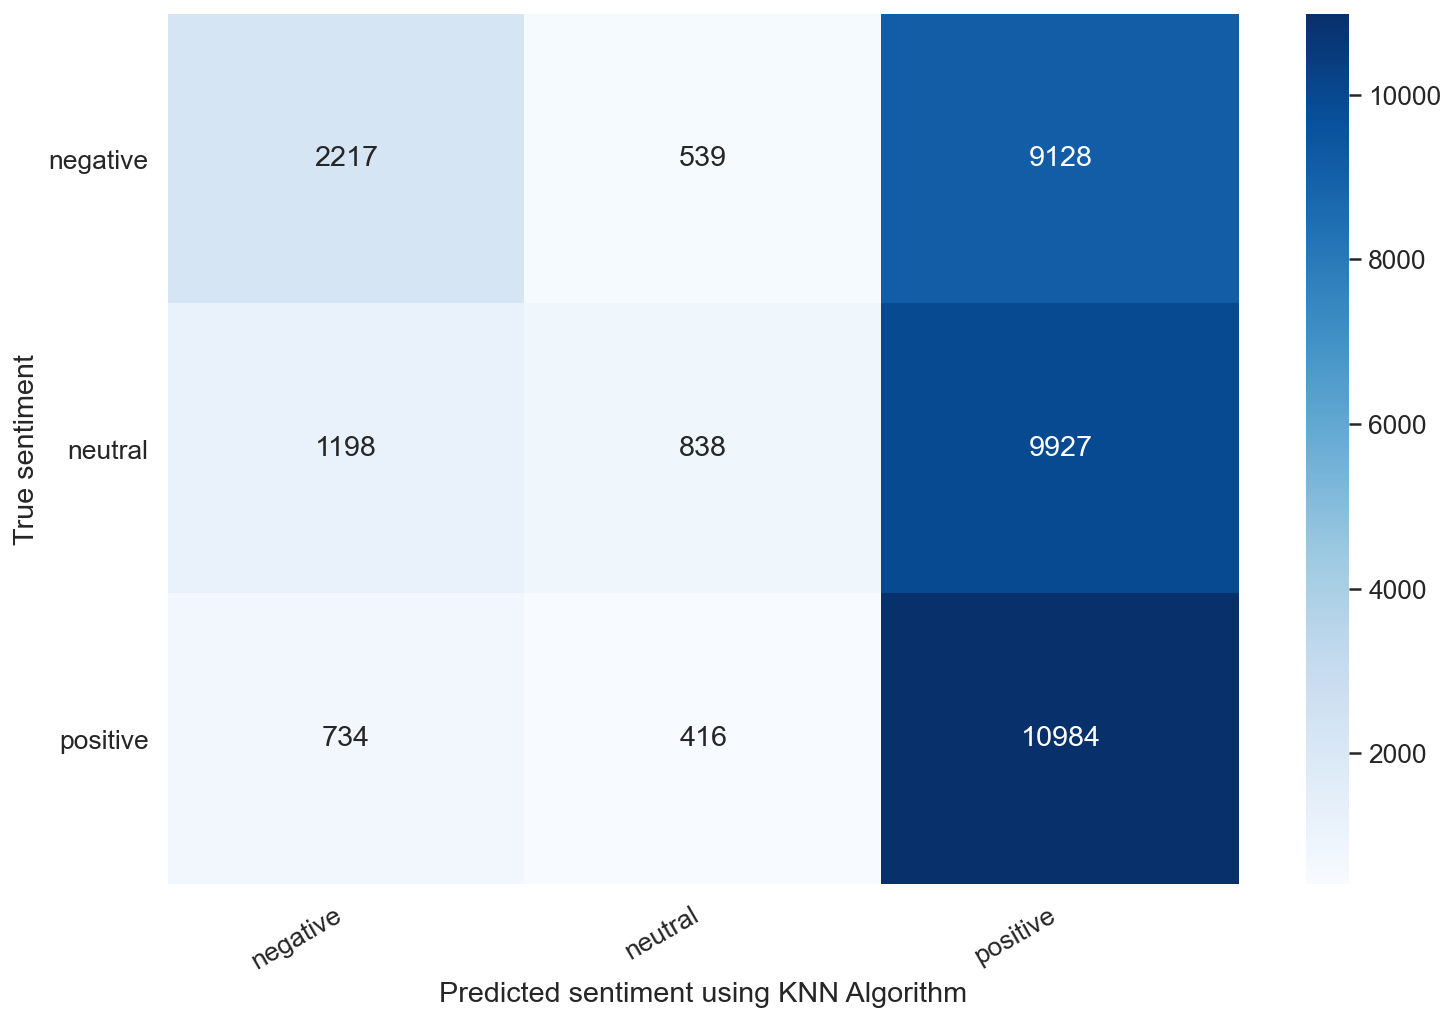

In [48]:
def KNN_show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('Actual sentiment')
    plt.xlabel('KNN Algorithm Predicted sentiment');
cm = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
KNN_show_confusion_matrix(df_cm)

# 6 Results

The table below consolidates the machine learning model metrics ascertained from the classification reports above. 


| Algorithm     | Sentiment | Precision | Recall | F1-Score | Support | Accuracy |
|---------------|-----------|-----------|--------|----------|---------|----------|
| Naïve-Bayes   | Negative  | 0.63      | 0.65   | 0.64     | 11884   | 0.6      |
|               | Neutral   | 0.48      | 0.59   | 0.53     | 11963   |          |
|               | Positive  | 0.75      | 0.55   | 0.63     | 12134   |          |
| Random Forest | Negative  | 0.64      | 0.73   | 0.68     | 11884   | 0.63     |
|               | Neutral   | 0.52      | 0.52   | 0.52     | 11963   |          |
|               | Positive  | 0.75      | 0.63   | 0.68     | 12134   |          |
| SVM           | Negative  | 0.68      | 0.71   | 0.7      | 11884   | 0.65     |
|               | Neutral   | 0.54      | 0.52   | 0.53     | 11963   |          |
|               | Positive  | 0.73      | 0.72   | 0.73     | 12134   |          |
| KNN           | Negative  | 0.53      | 0.19   | 0.28     | 11884   | 0.39     |
|               | Neutral   | 0.47      | 0.07   | 0.12     | 11963   |          |
|               | Positive  | 0.37      | 0.91   | 0.52     | 12134   |          |

The Naïve-Bayes, Random Forest and SVM appear to have similar results regarding their accuracy in predicting the sentiment of a review, scoring 60%, 63% and 65% respectively. With KNN as expected performing the poorest of the four selected at 39% accuracy.  

The 2x2 collage below consolidates the machine learning model metrics ascertained from the confusion matrices created for each mode. 


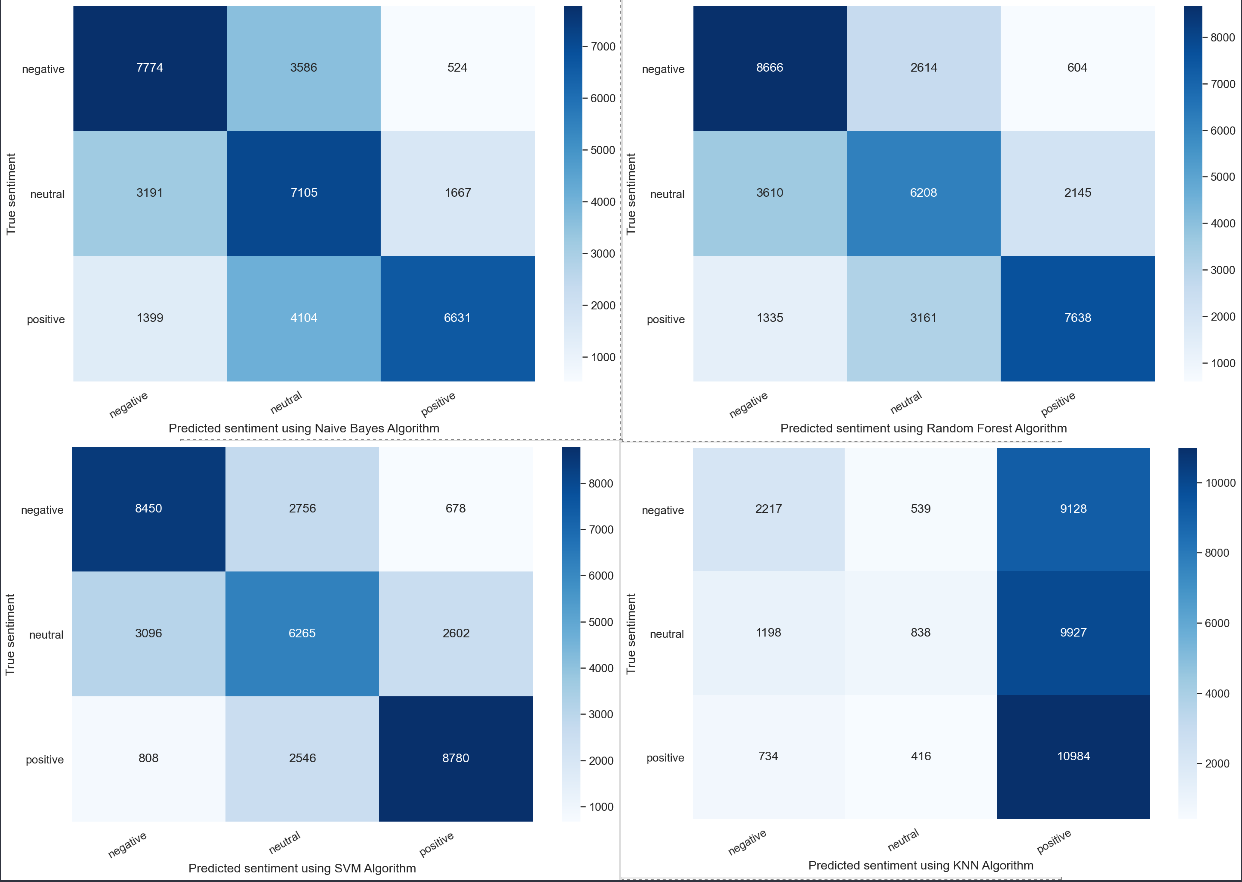

The true negatives and true positives for the KNN are low vs the other models, as reflected in its accuracy. The precision is a bit better for predicting both the reviews that were positive and negative but the recall is much lower. The Naive Bayes algorithm appears to be the most balanced the 3 models that scored over 50% and seems to do an admirable job classifying neutral sentiments, which can be difficult. Random forest appears to be best at accurately classifying positive sentiments, where as SVM appears best at classifying negative sentiments.

# 7 Conclusion




To conclude, regarding the research questions set out at the start of the assignment, it can be said that yes sentiment analysis can help predict the sentiment of user reviews on amazon, but perhaps not accurately enough to make informed decision within the worlds of marketing or finance. The 3 highest performing algorithms preformed similarly. Since a lot of preprocessing is required prior to developing the machine learning models, it is difficult to say for sure if more stringent cleaning of the text would lead to more accurate results. There are perhaps some stop words within the preprocessing section that should of been exempt that may have an effect on the accuracy of predicting sentiments. 

If I had more time or a chance to restart this assignment again with the knowledge I have now, I would almost certainly implement some form of deep learning algorithm to compare my machine learning models against. Specifically the BERT algorithm, which would appear to be a promising candidate for exactly this kind of project.

Another consideration would be the device or platform the project would be completed on. One of the biggest impediments of this assignments was the lack of an ability to quickly develop prototype of work to test. Due to the limitations of my hardware, the training and testing for all 4 machine learning models took a combined 4 hours total. Due t my background in software development, where prototyping is part and parcel of everyday life, my assumption going in was I would be able to easily recalibrate my preprocessing functions in the hopes of increasing the accuracy of my models. The length of time to train and test each model made this infeasible. This was an oversight on my behalf. Using an offering like Hadoop or Databricks would better serve any future similar projects.

# 8 References


Bennett, K. and Campbell, C., 2000. Support vector machines. ACM SIGKDD Explorations Newsletter, 2(2), pp.1-13.

Breiman, L., 1996. Bagging predictors. Machine Learning, 24(2), pp.123-140.

Breiman, L., 2001. Machine Learning, 45(1), pp.5-32.

Cervantes, J., Garcia-Lamont, F., Rodríguez-Mazahua, L. and Lopez, A., 2020. A comprehensive survey on support vector machine classification: Applications, challenges and trends. Neurocomputing, 408, pp.189-215.

Cortes, C. and Vapnik, V., 1995. Support-vector networks. Machine Learning, 20(3), pp.273-297.

Domingos, P., 2012. A few useful things to know about machine learning. Communications of the ACM, 55(10), pp.78-87.

Hadi, W., Al-Radaideh, Q. and Alhawari, S., 2018. Integrating associative rule-based classification with Naïve Bayes for text classification. Applied Soft Computing, 69, pp.344-356.

Hartmann, J., Huppertz, J., Schamp, C. and Heitmann, M., 2019. Comparing automated text classification methods. International Journal of Research in Marketing, 36(1), pp.20-38.

Humphreys, A. and Wang, R., 2017. Automated Text Analysis for Consumer Research. Journal of Consumer Research, 44(6), pp.1274-1306.

Jiang, L., Li, C., Wang, S. and Zhang, L., 2016. Deep feature weighting for naive Bayes and its application to text classification. Engineering Applications of Artificial Intelligence, 52, pp.26-39.

Kao, A., 2010. Natural Language Processing and Text Mining. London: Springer.

Kim, H., Kim, J., Kim, J. and Lim, P., 2018. Towards perfect text classification with Wikipedia-based semantic Naïve Bayes learning. Neurocomputing, 315, pp.128-134.

Luo, X., 2021. Efficient English text classification using selected Machine Learning Techniques. Alexandria Engineering Journal, 60(3), pp.3401-3409.

Manning, C., Raghavan, P. and Schütze, H., 2018. Introduction to information retrieval. Cambridge: Cambridge University Press.

Purwandari, K., Sigalingging, J., Cenggoro, T. and Pardamean, B., 2021. Multi-class Weather Forecasting from Twitter Using Machine Learning Aprroaches. Procedia Computer Science, 179, pp.47-54.

Thomas, K., 2019. Sentiment Analysis in Product Reviews using Natural Language Processing and Machine Learning. International Journal of Information Systems and Computer Sciences, 8(2), pp.147-151.

Yang, Y., 1999. Information Retrieval, 1(1/2), pp.69-90.

Yang, Z., Nie, X., Xu, W. and Guo, J., 2006. An Approach to Spam Detection by Naive Bayes Ensemble Based on Decision Induction. Sixth International Conference on Intelligent Systems Design and Applications,.

Yu, Y., Shao, M., Jiang, L., Ke, Y., Wei, D., Zhang, D., Jiang, M. and Yang, Y., 2021. Quantitative analysis of multiple components based on support vector machine (SVM). Optik, 237, p.166759.

# 9 Appendices

The totality of this project, along with all accompanying material can be accessed at my github repository located at https://github.com/oreillyalan/assignment1-